In [2]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow_datasets as tfds

In [3]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

## Работаем с файлами

In [4]:
# Задаем рабочую папку

import os
os.chdir("/home/dima/telegram_bot")

Переименуем и перенесем файлы, чтобы можно было их легко в датасет занести

In [6]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

2023-08-01 21:07:18.359747: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /home/dima/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete1ZMOPR/cats_vs_dogs-train.tfrecord*...: …

Dataset cats_vs_dogs downloaded and prepared to /home/dima/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [7]:
SIZE = 224
def resize_image(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img = img / 255.0
  return img, label

In [8]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.layers import Input
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


pretrained = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
pretrained.trainable = False

model = keras.Sequential([
    # Base
    pretrained,
    # Head
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [10]:
valid_dataset = train_batches.take(500)
train_dataset = train_batches.skip(500)

## Строим нейронную сеть

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
# these are a new feature in TF 2.2
from tensorflow.keras.layers.experimental import preprocessing


pretrained_base = tf.keras.models.load_model(
    'input/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

model = keras.Sequential([
    # Base
    pretrained_base,
    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(
      train_dataset,
      validation_data=valid_dataset,
      epochs=2,
      )

Epoch 1/2


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 66/954 [=>............................] - ETA: 2:12 - loss: 0.2448 - accuracy: 0.9072

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


163/954 [====>.........................] - ETA: 1:58 - loss: 0.1583 - accuracy: 0.9421

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


165/954 [====>.........................] - ETA: 1:58 - loss: 0.1571 - accuracy: 0.9428

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


196/954 [=====>........................] - ETA: 1:54 - loss: 0.1454 - accuracy: 0.9477

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


515/954 [===============>..............] - ETA: 1:06 - loss: 0.0934 - accuracy: 0.9675

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


720/954 [=====================>........] - ETA: 36s - loss: 0.0811 - accuracy: 0.9711

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


753/954 [======================>.......] - ETA: 31s - loss: 0.0796 - accuracy: 0.9714

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


782/954 [=======================>......] - ETA: 26s - loss: 0.0790 - accuracy: 0.9717

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


854/954 [=========================>....] - ETA: 15s - loss: 0.0779 - accuracy: 0.9718

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


870/954 [==========================>...] - ETA: 13s - loss: 0.0776 - accuracy: 0.9718

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


954/954 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9733

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


954/954 [==============================] - 273s 279ms/step - loss: 0.0741 - accuracy: 0.9733 - val_loss: 0.0486 - val_accuracy: 0.9833
Epoch 2/2


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 70/954 [=>............................] - ETA: 2:24 - loss: 0.0371 - accuracy: 0.9911

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


167/954 [====>.........................] - ETA: 2:13 - loss: 0.0489 - accuracy: 0.9854

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


169/954 [====>.........................] - ETA: 2:13 - loss: 0.0484 - accuracy: 0.9856

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


200/954 [=====>........................] - ETA: 2:06 - loss: 0.0490 - accuracy: 0.9853

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


519/954 [===============>..............] - ETA: 1:12 - loss: 0.0474 - accuracy: 0.9835

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


724/954 [=====================>........] - ETA: 38s - loss: 0.0463 - accuracy: 0.9840

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


757/954 [======================>.......] - ETA: 32s - loss: 0.0464 - accuracy: 0.9841

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


786/954 [=======================>......] - ETA: 27s - loss: 0.0472 - accuracy: 0.9838

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


859/954 [==========================>...] - ETA: 15s - loss: 0.0466 - accuracy: 0.9838

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


875/954 [==========================>...] - ETA: 13s - loss: 0.0465 - accuracy: 0.9838

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


954/954 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9841

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


954/954 [==============================] - 243s 249ms/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0.0463 - val_accuracy: 0.9849


In [14]:
model.save('my_model.h5')

## Пример загрузки модели

In [21]:
from tensorflow.keras.models import load_model
import tensorflow_hub as hub

img = load_img('photo.jpg')
img_array = img_to_array(img)
img_resized, _ = resize_image(img_array, '_')
img_expended = np.expand_dims(img_resized, axis=0)

# Загрузка модели из файла .h5
model_ = load_model('my_model.h5',
                       custom_objects={'KerasLayer': hub.KerasLayer})
prediction = model.predict(img_expended)[0][0]

1/1 [==============================] - 0s 29ms/step


Собака


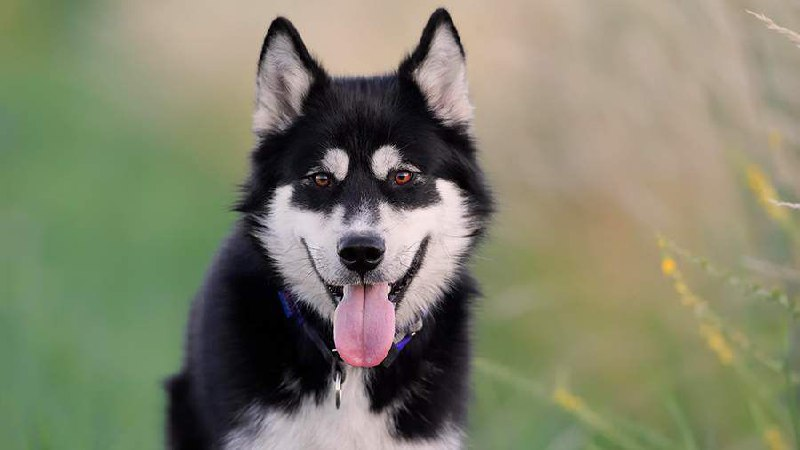

In [30]:
prediction_ = 'Собака' if prediction > 0.5 else 'Кошка'

print(prediction_)

img